<h2>Working With SQL</h2>
<figure>
    <img src="https://w7.pngwing.com/pngs/195/221/png-transparent-sql-server-dba-microsoft-sql-server-database-management-system-logo-oracle-sql-logo-angle-text-logo-thumbnail.png">
</figure>

In [1]:
!pip install pyodbc

In [1]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Check available driver
pyodbc.drivers()

['SQL Server',
 'ODBC Driver 17 for SQL Server',
 'SQL Server Native Client RDA 11.0',
 'Microsoft Access Driver (*.mdb, *.accdb)',
 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)',
 'Microsoft Access Text Driver (*.txt, *.csv)']

In [3]:
# Create MSSQL Connection
connectionString = pyodbc.connect('driver={SQL Server};' 'Server=DESKTOP-6F66SDS\SQLEXPRESS;' 'Database=Tutorials;' 'Trusted_connection=yes')

In [4]:
# SQL Command to read data
sqlQuery = 'select * from dbo.studentInfo'

In [5]:
# Load data to DataFrame
df = pd.read_sql(sql =sqlQuery, con = connectionString)

In [6]:
df.head()

,studentid,firstName,LastName,Age,Gender,PhoneNumber
0,101,Jacobson,Koryele,23,Male,08073528362
1,102,Mark,Henry,45,Male,08035464631
2,103,Blue,Kamsi,22,Female,08163524522
3,104,Chris,Sam,24,Male,08066124320
4,105,Kamanu,Timothy,34,Male,07032567211


In [7]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   studentid    10 non-null     int64 
 1   firstName    10 non-null     object
 2   LastName     10 non-null     object
 3   Age          10 non-null     int64 
 4   Gender       10 non-null     object
 5   PhoneNumber  10 non-null     object
dtypes: int64(2), object(4)
memory usage: 612.0+ bytes


In [8]:
# Shape of data
df.shape

(10, 6)

In [9]:
# Value counts
df.Gender.value_counts()

Gender
Male      5
Female    5
Name: count, dtype: int64

In [10]:
# Crosstab
pd.crosstab(df.Gender, df.Age)

Age,21,22,23,24,29,31,32,34,45,65
Gender,,,,,,,,,,
Female,1,1,0,0,1,0,1,0,0,1
Male,0,0,1,1,0,1,0,1,1,0


In [11]:
# Check missing data
df.isnull().sum()

studentid      0
firstName      0
LastName       0
Age            0
Gender         0
PhoneNumber    0
dtype: int64

In [12]:
# Data Overview
df.stack()

0  studentid              101
   firstName         Jacobson
   LastName           Koryele
   Age                     23
   Gender                Male
   PhoneNumber    08073528362
1  studentid              102
   firstName             Mark
   LastName             Henry
   Age                     45
   Gender                Male
   PhoneNumber    08035464631
2  studentid              103
   firstName             Blue
   LastName             Kamsi
   Age                     22
   Gender              Female
   PhoneNumber    08163524522
3  studentid              104
   firstName            Chris
   LastName               Sam
   Age                     24
   Gender                Male
   PhoneNumber    08066124320
4  studentid              105
   firstName           Kamanu
   LastName           Timothy
   Age                     34
   Gender                Male
   PhoneNumber    07032567211
5  studentid              106
   firstName         Victoria
   LastName               Jay
   Age    

In [13]:
# Data stat
df.describe().T

,count,mean,std,min,25%,50%,75%,max
studentid,10.0,105.5,3.027650,101.0,103.25,105.5,107.75,110.0
Age,10.0,32.6,13.475904,21.0,23.25,30.0,33.50,65.0


In [14]:
# Max Value for age
df.Age.max()

65

In [15]:
# Min Age Value
df.Age.min()

21

In [16]:
# Index of max
df.Age.idxmax()

8

In [17]:
# Index of min
df.Age.idxmin()

5

In [18]:
df[df['Age'] >= 30]

,studentid,firstName,LastName,Age,Gender,PhoneNumber
1,102,Mark,Henry,45,Male,08035464631
4,105,Kamanu,Timothy,34,Male,07032567211
6,107,Flora,Jay,32,Female,08031216542
8,109,Remi,Oluwa,65,Female,08189765432
9,110,Jefferey,Babetunde,31,Male,0808543231


In [19]:
df.Age.nunique()

10

In [20]:
df['Average'] = np.linspace(50, 100, 10)
df.Average

0     50.000000
1     55.555556
2     61.111111
3     66.666667
4     72.222222
5     77.777778
6     83.333333
7     88.888889
8     94.444444
9    100.000000
Name: Average, dtype: float64

In [21]:
df.Average = round(df.Average, 2)

In [22]:
df.tail()

,studentid,firstName,LastName,Age,Gender,PhoneNumber,Average
5,106,Victoria,Jay,21,Female,07033217890,77.78
6,107,Flora,Jay,32,Female,08031216542,83.33
7,108,Divine,Philip,29,Female,0903321344,88.89
8,109,Remi,Oluwa,65,Female,08189765432,94.44
9,110,Jefferey,Babetunde,31,Male,0808543231,100.00


In [23]:
#df.drop(columns="Grade", inplace=True)

In [24]:
def Grade(n):
    if n == 50.0 or n <= 60.0:
        return "C"
    elif n == 61.0 or n <= 70.0:
        return "B"
    else:
        return "A"

In [25]:
df['Grade'] = df['Average'].apply(Grade)

In [26]:
df.head()

,studentid,firstName,LastName,Age,Gender,PhoneNumber,Average,Grade
0,101,Jacobson,Koryele,23,Male,08073528362,50.00,C
1,102,Mark,Henry,45,Male,08035464631,55.56,C
2,103,Blue,Kamsi,22,Female,08163524522,61.11,B
3,104,Chris,Sam,24,Male,08066124320,66.67,B
4,105,Kamanu,Timothy,34,Male,07032567211,72.22,A


In [27]:
df.loc[[2,3,4]]

,studentid,firstName,LastName,Age,Gender,PhoneNumber,Average,Grade
2,103,Blue,Kamsi,22,Female,08163524522,61.11,B
3,104,Chris,Sam,24,Male,08066124320,66.67,B
4,105,Kamanu,Timothy,34,Male,07032567211,72.22,A


In [28]:
#pivot Table
# pd.pivot_table(df, values='Grade', index=['Gender', 'Age'], columns=['Average'], aggfunc=sum)
pd.pivot_table(df, values='Grade', index=['Gender', 'Age'], aggfunc=sum)

Grade
Gender Age      
Female 21      A
       22      B
       29      A
       32      A
       65      A
Male   23      C
       24      B
       31      A
       34      A
       45      C

In [29]:
df.describe().columns

Index(['studentid', 'Age', 'Average'], dtype='object')

<h2>Data Visualisation</h2>

<Figure size 500x400 with 0 Axes>

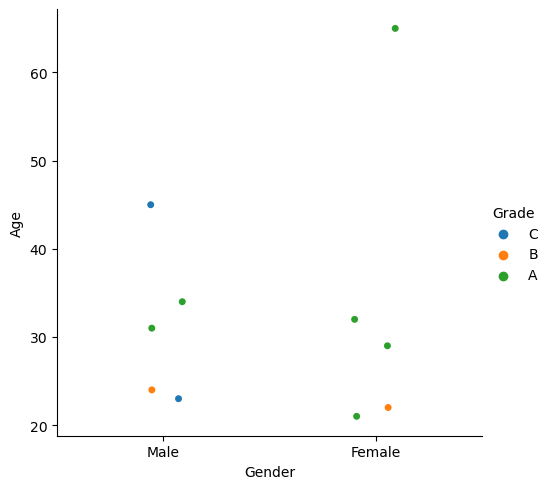

In [30]:
fig = plt.figure(figsize=[5,4]);
sns.catplot(data=df, x='Gender', y='Age',hue='Grade');
plt.xlabel("Gender");
plt.ylabel('Age');
plt.show();

Text(0, 0.5, 'Grade')

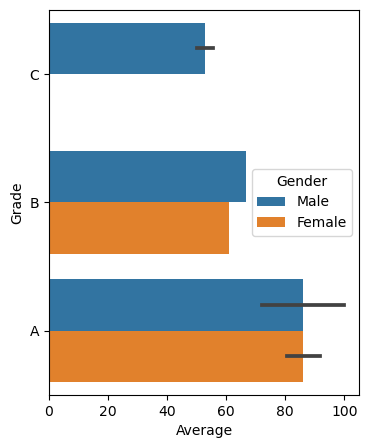

In [31]:
fig = plt.figure(figsize=[4,5])
sns.barplot(data= df, x='Average', y='Grade', hue='Gender')
plt.xlabel('Average')
plt.ylabel('Grade')

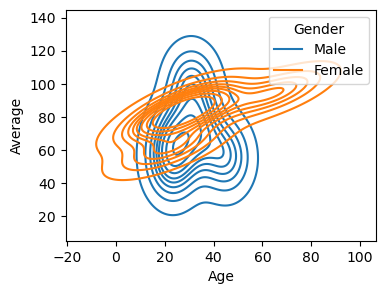

In [32]:
fig = plt.figure(figsize=[4,3]);
sns.kdeplot(data=df, x='Age', y='Average', hue="Gender");
plt.xlabel('Age');
plt.ylabel('Average');

<Axes: >

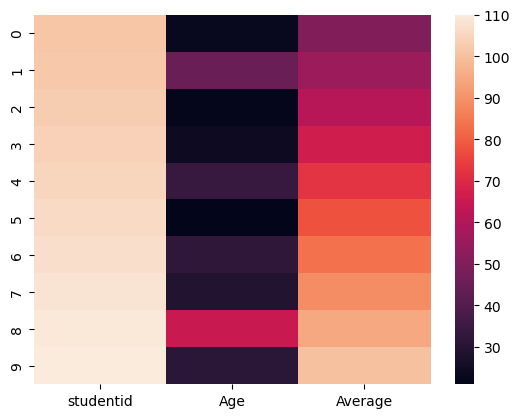

In [33]:
sns.heatmap(df[['studentid', 'Age', 'Average']])

In [35]:
df.groupby('Gender')['Average'].max()

Gender
Female     94.44
Male      100.00
Name: Average, dtype: float64

In [36]:
df.groupby('Gender')['Average'].mean()

Gender
Female    81.11
Male      68.89
Name: Average, dtype: float64

<p>Although male had the highest Average score their average is lower than that of the females by over 12.28 which is more than 10%</p>

In [37]:
df.to_csv('StudentInfo')